<a href="https://colab.research.google.com/github/LucaChuang/Deep-learning-Project/blob/main/Red_wine_project_1008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Project One- Red Wine Quality analysis
Author: Team 1
* 2863031 Yunan Chen
* 2863088 Shen-Wei Chuang 
* 2868872 Simeng Deng 
* 2854110 Zhuo Chen


Links to data: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

# Introduction/ Motivation/ Literature Review

Before the pandemic, sales of wine have already slowed down. Older customers drink less as they age and winemakers find it hard to attract young consumers as some of them tend to seek a healthier lifestyle without drinking and others have multiple choices for beverages like beer and spirits.[1] US Industry data shows that Millennials consume more liquor and beer than wine. Besides, hard seltzer also becomes more and more popular among young consumers. [2] Traditional winemakers need to develop products that appeal to young customers, like single-serve packing and special flavors, to cope with the fierce competition. 

Right now, in the post-pandemic era, customer trends have shifted dramatically in the wine industry. Consumers tend to drink at home to avoid infection, so the demand for on-premise choices and off-premise section totally reversed and sales of off-premise retail channels increased largely. Except for this opportunity, due to the economic shock caused by the pandemic, most people would curtail unnecessary expenses, so expensive wine is absolutely not a desired option.[3] Normally, the gross margin of wineries is 50%. However, under the situation of low demand, the profit margins of wineries decline as fixed cost still remains the same.[4] To maintain profitability, on the one hand, wineries need to develop charming products to expand the younger market. On the other hand, taking advantage of high-tech could avoid unnecessary loss and achieve desirable results. As in-line detection is still not promoted in the wine industry, post-production evaluation and off-site laboratory analysis could not detect the fermentation issues in time to avoid economic losses.[5] The usage of sensors to record fermentation parameters make it possible to detect problems immediately and shape wine character deliberately.[6] 

Precise prediction on desired wine quality based on physicochemical parameters would give wine producers insights about essential elements to achieve a certain quality class. Thus, defective products would possibly reduce and cost decline either. The red wine dataset was firstly built to support the wine certification and quality assessment, both of which are essential to assure wine quality and help with setting prices. [7] It contains fundamental properties of wine. For example, attributes relate to taste including acidity(fixed acidity/ volatile acidity/ citric acid/ pH), sweetness (residual sugar), salty( chlorides) and alcohol.[8] Most of these attributes could be controlled during the production process to achieve desirable wine quality. Take pH for example, the wine’s pH is fundamental for flavour and for preventing microbiological spoilage. [9] The desired pH for red wines is around $3.4$. If we want to lower the pH, the most natural way is to add tartaric acid. To increase the pH is just the opposite, tartaric acid need to be decreased and it is achieved through using deacidifying agent such as carbonate salts.[10] Overall, during the fermentation management process, our model would be a good reference for wineries.


#Data Gathering and Description 

## Data Dictionary

**Acid Types and Measures**
* **fixed acidity**: Fixed acids include tartaric, malic, citric, and succinic acids which are found in grapes.
* **volatile acidity**: These acids are to be distilled out from the wine before completing the production process..
* **citric acid**: This is one of the fixed acids which gives a wine its freshness.
* **pH**: Solutions with a pH less than 7 are acidic, while solutions with a pH greater than 7 are basic. With a pH of 7, pure water is neutral. Most wines have a pH between 2.9 and 3.9 and are therefore acidic.

**Sweetness Measure:**
* **residual sugar**: Natural sugar remains from grapes after the fermentation process stops.

**Salty Measure:**
* **chlorides**: Chloride concentration in the wine is influenced by terroir and its highest levels are found in wines coming from countries where irrigation is carried out using salty water or in areas with brackish terrains. 

**Sulfites Measure:**
* **sulphates**: These are mineral salts containing sulfur. 
* **free sulfur dioxide**: This is the part of the sulphur dioxide that when added to a wine is said to be free after the remaining part binds. 
* **total sulfur dioxide**: The sum total of the bound and the free sulfur dioxide. This is mainly added to kill harmful bacteria and preserve quality and freshness. The legal limitation for sulfur levels is regulated. Excess of it can even kill good yeast and give out undesirable odour.

**Body Measure:**
* **density**: This can be represented as a comparison of the weight of a specific volume of wine to an equivalent volume of water. It is generally used as a measure of the conversion of sugar to alcohol. 

**Alcohol**
* **Alcohol**: Alcohol is formed as a result of yeast converting sugar during the fermentation process. It's usually measured in % vol or alcohol by volume (ABV).

**Quality**: Wine experts graded the wine quality between 0 (very bad) and 10 (very excellent). The eventual quality score is the median of at least three evaluations made by the same wine experts.



## Set up the environment

In [ ]:
# for reading data
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
import keras
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statistics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#for plot
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# for modeling
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.utils import class_weight

import warnings
warnings.filterwarnings("ignore") 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Set our data

In [ ]:
# read in the data
file_path = '/content/drive/Shared drives/Deep Learning Team1/Red win quality project/winequality-red.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# shuffle the dataset! 
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
X = df.drop("quality", axis=1)
y = pd.DataFrame(df['quality'])

## EDA

### Check the variables

In [ ]:
# No missing value in this dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Take a look at the target data[quality]

In [ ]:
# check out traget data distribution
# quality scores vary from 3 to 8
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

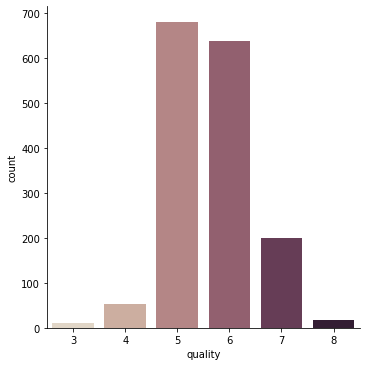

In [ ]:
# Distribution of target
sns.catplot(x="quality", kind="count", palette="ch:.25", data=df)
plt.show()

### Take a look at the relationship between our variables

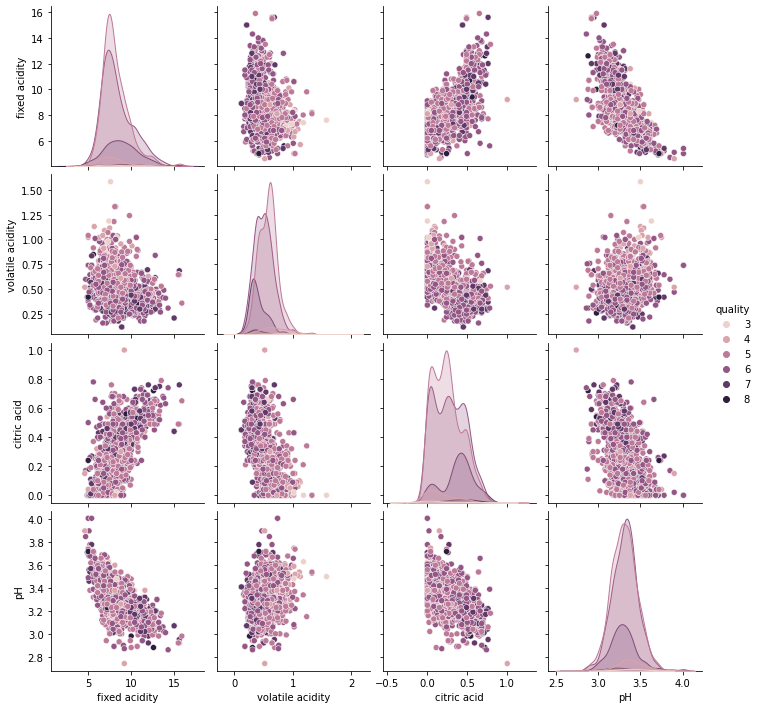

In [ ]:
# Acid Types and Measures
acid = sns.pairplot(df, vars=["fixed acidity", "volatile acidity","citric acid", "pH"], hue="quality")
plt.show(acid)

# Higer quality wine has lower fixed acidity and volatile acidity.

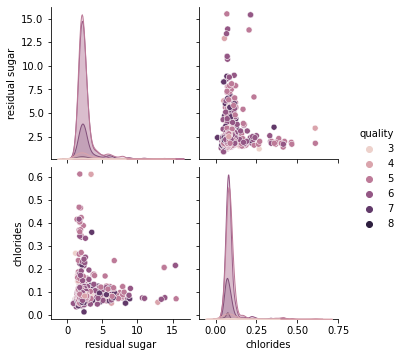

In [ ]:
# Sweetness and Salty Measure:
h = sns.pairplot(df, vars=["residual sugar", "chlorides"], hue="quality")
plt.show(h)

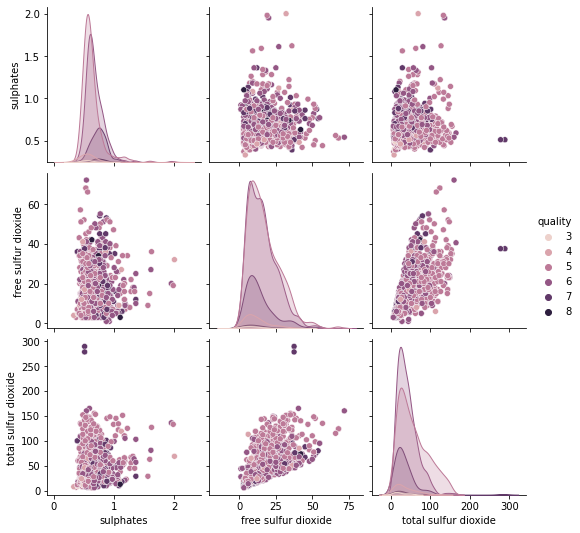

In [ ]:
# Sulfites Measure:
i = sns.pairplot(df, vars=["sulphates","free sulfur dioxide","total sulfur dioxide"], hue="quality")
plt.show(i)

# Higher quality has higher sulphates. It's reasonable as sulphates is essential elements affecting wine armoa and flavor.

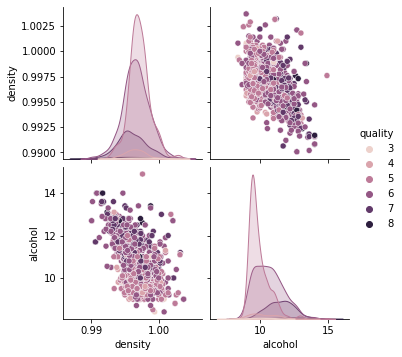

In [ ]:
# Body Measure and Alcohol
j = sns.pairplot(df, vars=["density","alcohol"], hue="quality")
plt.show(j)

# The mean of alchol increased as quality score increase. 
# Better wine tends to have higher alcohol concentration.

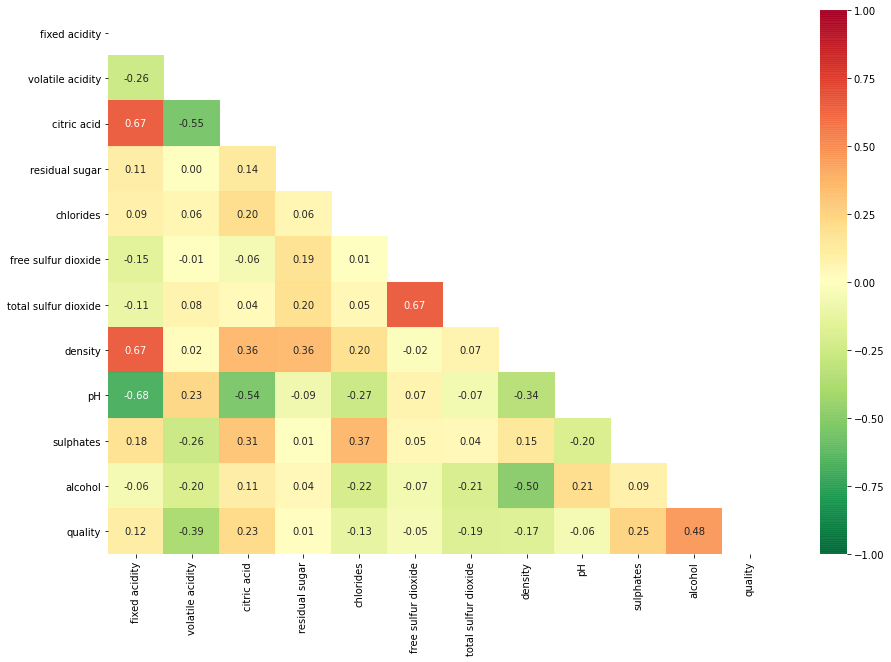

In [ ]:
plt.subplots(figsize=(15,10))
df_corr = df.corr(method = 'pearson', min_periods = 1)
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_corr, 
            cmap= 'RdYlGn_r',  
            mask = mask,
            alpha = 0.95,
            annot = True,
            center=0,
            fmt = '.2f',
            vmin = -1,
            vmax = 1)
plt.show()

### Detecting multicollinearity using variance inflation factors

In [ ]:
# variation inflation factor
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,features,vif
0,fixed acidity,74.452265
1,volatile acidity,17.060026
2,citric acid,9.183495
3,residual sugar,4.662992
4,chlorides,6.554877
5,free sulfur dioxide,6.442682
6,total sulfur dioxide,6.519699
7,density,1479.287209
8,pH,1070.967685
9,sulphates,21.590621


### check the check some interesting predictor


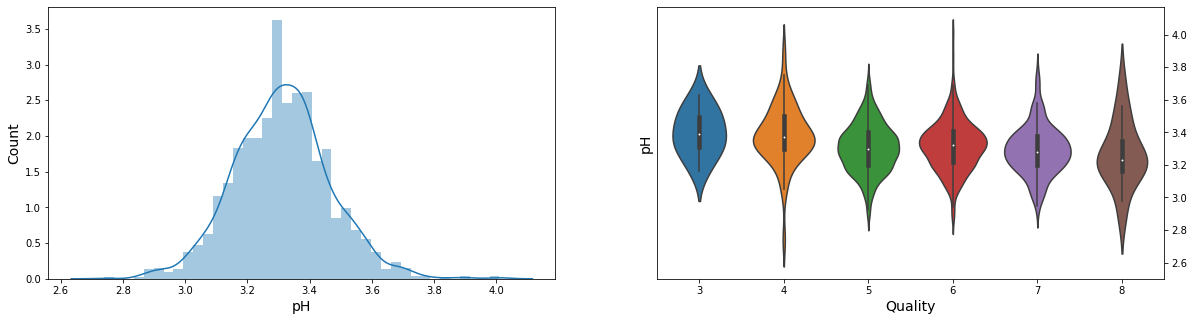

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(20,5))

sns.distplot(df['pH'], ax = axes[0])
axes[0].set_xlabel('pH', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'pH', data = df, ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('pH', fontsize=14)
axes[1].yaxis.tick_right()

plt.show()

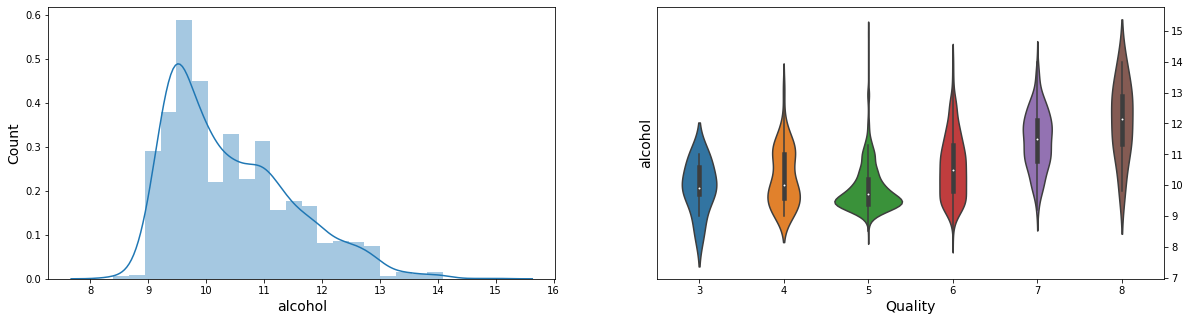

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(20,5))

sns.distplot(df['alcohol'], ax = axes[0])
axes[0].set_xlabel('alcohol', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'alcohol', data = df, ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('alcohol', fontsize=14)
axes[1].yaxis.tick_right()

plt.show()

### Make 3D plot to check how each class distribute

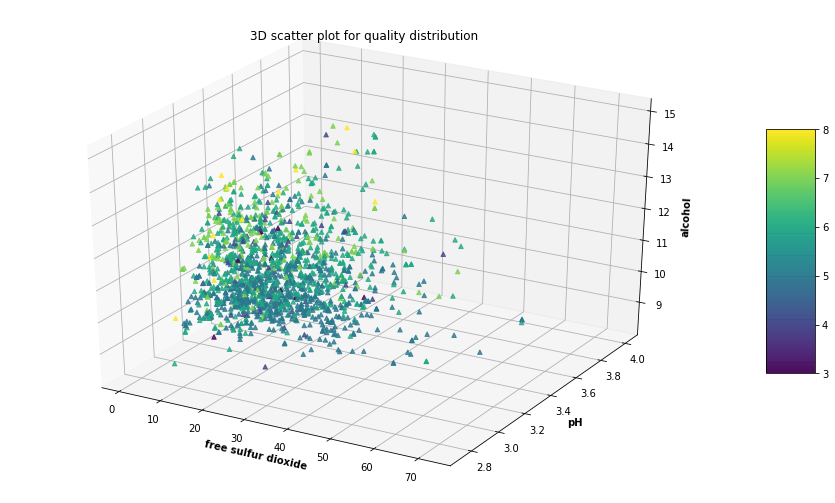

In [ ]:
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection='3d')

sctt = ax.scatter3D(df['free sulfur dioxide'], df['pH'], df['alcohol'],
                    alpha = 0.8,
                    c = df['quality'], 
                    cmap = 'viridis', 
                    marker ='^')

plt.title("3D scatter plot for quality distribution")
ax.set_xlabel('free sulfur dioxide', fontweight ='bold') 
ax.set_ylabel('pH', fontweight ='bold') 
ax.set_zlabel('alcohol', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

plt.show()
# plot distribution base on 3 dimension, extract 3 variabls that have high correlation with target. 
# we can see from the plot that most of the light points local in low free sulfur dioxide, high alcohol, and medium to high range of PH.

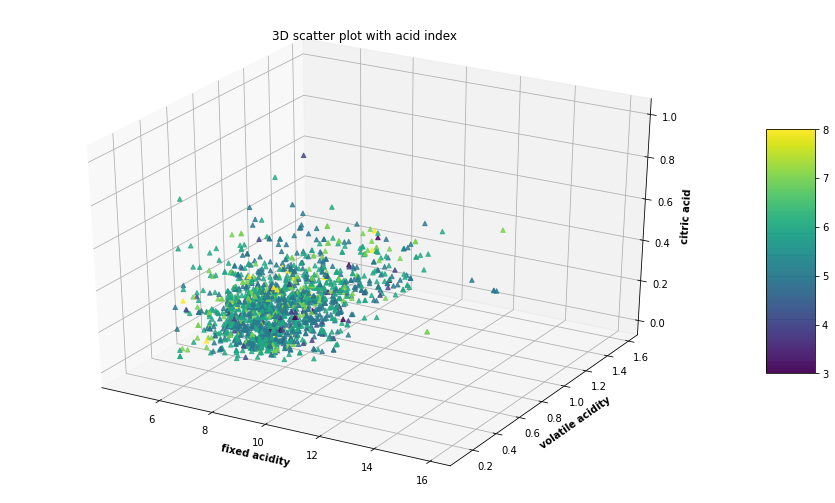

In [ ]:
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection='3d')

sctt = ax.scatter3D(df['fixed acidity'], df['volatile acidity'], df['citric acid'],
                    alpha = 0.8,
                    c = df['quality'], 
                    cmap = 'viridis', 
                    marker ='^')
plt.title("3D scatter plot with acid index")
ax.set_xlabel('fixed acidity', fontweight ='bold') 
ax.set_ylabel('volatile acidity', fontweight ='bold') 
ax.set_zlabel('citric acid', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

# in this plot, we want to check the relationship between target and 3 kind of acidity index
# seems like they clustering togather, it's hard to identify any pattern from this plot. 

In [ ]:
# extract 3 major class 5,6,7
class_5 = df[df['quality']==5]
class_6 = df[df['quality']==6]
class_7 = df[df['quality']==7]

In [ ]:
fig = go.Figure()
fig.add_trace(go.Mesh3d(x=class_5['free sulfur dioxide'],
                   y=class_5['pH'],
                   z=class_5['alcohol'],
                   opacity=0.5,
                   color='yellow'
                  ))
fig.add_trace(go.Mesh3d(x=class_6['free sulfur dioxide'],
                   y=class_6['pH'],
                   z=class_6['alcohol'],
                   opacity=0.5,
                   color='blue'
                  ))
fig.add_trace(go.Mesh3d(x=class_7['free sulfur dioxide'],
                   y=class_7['pH'],
                   z=class_7['alcohol'],
                   opacity=0.5,
                   color='green'
                  ))
fig.update_layout(scene = dict(
                    xaxis_title='free sulfur dioxide',
                    yaxis_title='pH',
                    zaxis_title='alcohol'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))

fig.show()

# extract 3 main class of the targer 5, 6, 7 and plot 3 surface to chech the how they change within the 3 important variables dimension.
# we can tell from the plot that with higher alcohol value, the hiher qulity of the wine.


# Modeling

## Baseline model

In [ ]:
print("Quality mode is " + str(statistics.mode(df['quality'])))
print("baseline model(mode) accuracy is " + str(len(df[df['quality']==5])/len(df['quality'])))

Quality mode is 5
baseline model(mode) accuracy is 0.425891181988743


In [ ]:
print(X.shape, y.shape)

# split into X_train and X_test
# always split into X_train, X_test first THEN apply minmax scaler
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123)


(1599, 11) (1599, 1)


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test) # Print accuracy score

0.578125

## Prepare data for modeling

In [ ]:
X = df.drop("quality", axis=1)
y = pd.DataFrame(df['quality'])

# convert to numpy array
X = np.array(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1279, 11) (320, 11) (1279, 1) (320, 1)


In [ ]:
# use minMax scaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [ ]:
# work with labels
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
encoder.fit(y_test)
encoded_y_train = encoder.transform(y_train)
encoded_y_test = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_train= np_utils.to_categorical(encoded_y_train)
dummy_y_test = np_utils.to_categorical(encoded_y_test)

print(encoded_y_train)

[3 3 2 ... 3 2 2]


In [ ]:
print(dummy_y_train)

[[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


## Models

1. Model 1: Multi-class Classification Model
2. Model 2: Regression Model 
3. Model 3: Oversample Miniroty
4. Model 4: Removed high VIF Variables
5. Model 5: Modify Class Weight in Keras
6. Model 6: Recode the target variable
7. Model 7: Modify Class Weight in Keras and Decode

### Model 1 Multi-class Classification Model

In [ ]:
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.2)) 
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 1000)              12000     
_________________________________________________________________
dropout_30 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_50 (Dense)             (None, 500)               500500    
_________________________________________________________________
dropout_31 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 6)                 3006      
Total params: 515,506
Trainable params: 515,506
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# early stopping callback
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=50, 
                                   restore_best_weights=True)
# fit the model!
history_1 = model.fit(X_train,
                    dummy_y_train,
                    callbacks=[es],
                    epochs=8000000, 
                    batch_size=10,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/8000000
103/103 [==============================] - 1s 7ms/step - loss: 1.1337 - accuracy: 0.5191 - val_loss: 1.0193 - val_accuracy: 0.5469
Epoch 2/8000000
103/103 [==============================] - 1s 6ms/step - loss: 1.0220 - accuracy: 0.5836 - val_loss: 0.9262 - val_accuracy: 0.5703
Epoch 3/8000000
103/103 [==============================] - 1s 6ms/step - loss: 0.9975 - accuracy: 0.5855 - val_loss: 0.9436 - val_accuracy: 0.5547
Epoch 4/8000000
103/103 [==============================] - 1s 6ms/step - loss: 0.9799 - accuracy: 0.5865 - val_loss: 0.9373 - val_accuracy: 0.5859
Epoch 5/8000000
103/103 [==============================] - 1s 6ms/step - loss: 0.9608 - accuracy: 0.6080 - val_loss: 1.0492 - val_accuracy: 0.5312
Epoch 6/8000000
103/103 [==============================] - 1s 6ms/step - loss: 0.9648 - accuracy: 0.5943 - val_loss: 0.9147 - val_accuracy: 0.5977
Epoch 7/8000000
103/103 [==============================] - 1s 6ms/step - loss: 0.9619 - accuracy: 0.5982 - val_loss: 0

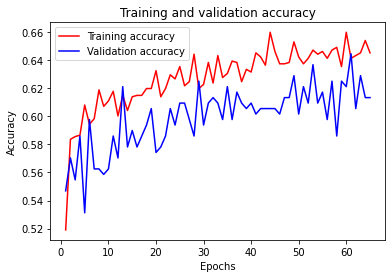

In [ ]:
history_dict = history_1.history

# learning curve - accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

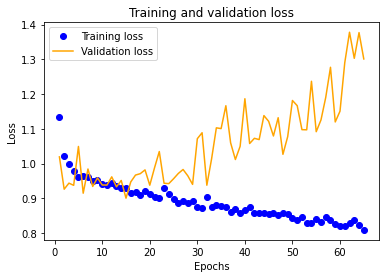

In [ ]:
# learning curve - loss
history_dict = history_1.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
preds = model.predict(X_train) # see how the model did!
matrix = confusion_matrix(dummy_y_train.argmax(axis=1), preds.argmax(axis=1))
matrix

array([[  0,   0,   7,   1,   0,   0],
       [  0,   0,  32,   9,   1,   0],
       [  0,   0, 445,  80,  10,   0],
       [  0,   0, 198, 250,  80,   0],
       [  0,   0,   7,  58,  88,   0],
       [  0,   0,   0,   2,  11,   0]])

In [ ]:
# more detail on how well things were predicted
print(classification_report(dummy_y_train.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00        42
           2       0.65      0.83      0.73       535
           3       0.62      0.47      0.54       528
           4       0.46      0.58      0.51       153
           5       0.00      0.00      0.00        13

    accuracy                           0.61      1279
   macro avg       0.29      0.31      0.30      1279
weighted avg       0.58      0.61      0.59      1279



In [ ]:
# test data
pred_test = model.predict(X_test)
pred_test


array([[2.9471012e-02, 1.4432824e-01, 3.9559579e-01, 3.3060598e-01,
        9.6059002e-02, 3.9399564e-03],
       [1.1995793e-06, 5.7811185e-04, 3.1117514e-02, 3.4000218e-01,
        5.5754888e-01, 7.0752047e-02],
       [1.2935647e-03, 4.1719653e-02, 6.2511855e-01, 3.2580009e-01,
        6.0663088e-03, 1.7679229e-06],
       ...,
       [1.0028702e-02, 5.1293407e-02, 5.2390563e-01, 3.7275964e-01,
        4.1671533e-02, 3.4114099e-04],
       [7.2371952e-02, 2.4276485e-01, 5.3186750e-01, 1.4116628e-01,
        1.1810311e-02, 1.9117615e-05],
       [8.1451802e-04, 2.1587824e-02, 2.1500809e-01, 5.8039999e-01,
        1.7452954e-01, 7.6600704e-03]], dtype=float32)

In [ ]:
matrix = confusion_matrix(dummy_y_test.argmax(axis=1), pred_test.argmax(axis=1))
matrix


array([[  0,   0,   2,   0,   0,   0],
       [  0,   0,  11,   0,   0,   0],
       [  0,   0, 115,  27,   4,   0],
       [  0,   0,  43,  49,  18,   0],
       [  0,   0,   4,  17,  25,   0],
       [  0,   0,   0,   1,   4,   0]])

In [ ]:
# more detail on how well things were predicted
print(classification_report(dummy_y_test.argmax(axis=1), pred_test.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        11
           2       0.66      0.79      0.72       146
           3       0.52      0.45      0.48       110
           4       0.49      0.54      0.52        46
           5       0.00      0.00      0.00         5

    accuracy                           0.59       320
   macro avg       0.28      0.30      0.29       320
weighted avg       0.55      0.59      0.57       320



### Model 2 Try a Regression Model


In [ ]:
# use minMax scaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary() 

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 1000)              12000     
_________________________________________________________________
dense_53 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_54 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 251       
Total params: 638,001
Trainable params: 638,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=10,
                   restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history_2 = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=5000,
                    batch_size=50,
                    verbose=1)

Epoch 1/5000
26/26 [==============================] - 0s 15ms/step - loss: 3.8218 - mae: 1.3311 - val_loss: 1.6006 - val_mae: 1.0758
Epoch 2/5000
26/26 [==============================] - 0s 11ms/step - loss: 1.3967 - mae: 0.9563 - val_loss: 1.0101 - val_mae: 0.8147
Epoch 3/5000
26/26 [==============================] - 0s 11ms/step - loss: 1.1749 - mae: 0.8697 - val_loss: 0.8931 - val_mae: 0.7171
Epoch 4/5000
26/26 [==============================] - 0s 11ms/step - loss: 1.0535 - mae: 0.8160 - val_loss: 0.6659 - val_mae: 0.6331
Epoch 5/5000
26/26 [==============================] - 0s 11ms/step - loss: 0.9895 - mae: 0.7937 - val_loss: 1.6388 - val_mae: 1.1075
Epoch 6/5000
26/26 [==============================] - 0s 11ms/step - loss: 0.9290 - mae: 0.7621 - val_loss: 0.6934 - val_mae: 0.6443
Epoch 7/5000
26/26 [==============================] - 0s 12ms/step - loss: 0.9400 - mae: 0.7687 - val_loss: 0.6287 - val_mae: 0.6211
Epoch 8/5000
26/26 [==============================] - 0s 12ms/step - 

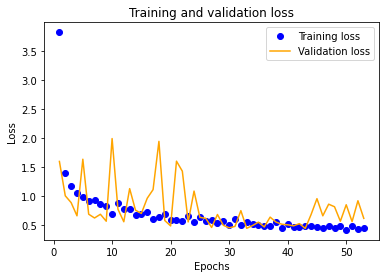

In [ ]:
# let's see the training and validation accuracy by epoch
history_dict = history_2.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

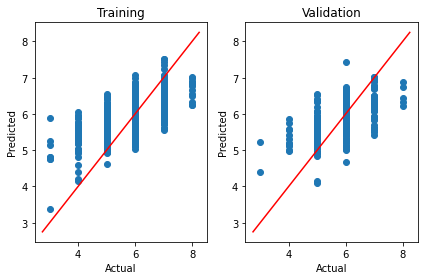

In [ ]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [ ]:
# metrics
pred = model.predict(X_test)
pred

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # tes

0.46567459904280745
0.5300633877515792


In [ ]:
pred_reg = round(pd.DataFrame(pred))

In [ ]:
matrix = confusion_matrix(y_test, pred_reg)
matrix

array([[ 0,  1,  1,  0,  0,  0],
       [ 0,  0,  7,  4,  0,  0],
       [ 0,  2, 86, 56,  2,  0],
       [ 0,  0, 21, 79, 10,  0],
       [ 0,  0,  1, 33, 12,  0],
       [ 0,  0,  0,  3,  2,  0]])

In [ ]:
# more detail on how well things were predicted
print(classification_report(y_test, pred_reg))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.74      0.59      0.66       146
           6       0.45      0.72      0.55       110
           7       0.46      0.26      0.33        46
           8       0.00      0.00      0.00         5

    accuracy                           0.55       320
   macro avg       0.28      0.26      0.26       320
weighted avg       0.56      0.55      0.54       320



### Model 3 oversample miniroty

In [ ]:
X = df.drop("quality", axis=1)
y = pd.DataFrame(df['quality'])

# convert to numpy array
X = np.array(X)
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123)
X_train, y_train = oversample.fit_resample(X_train, y_train)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3210, 11) (320, 11) (3210,) (320, 1)


In [ ]:
# use minMax scaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [ ]:
# work with labels
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
encoder.fit(y_test)
encoded_y_train = encoder.transform(y_train)
encoded_y_test = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_train= np_utils.to_categorical(encoded_y_train)
dummy_y_test = np_utils.to_categorical(encoded_y_test)

print(encoded_y_train)

[3 3 2 ... 5 5 5]


In [ ]:
print(dummy_y_train)

[[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


In [ ]:
# build the model!
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.2)) 
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.2)) 
model.add(Dense(6, activation='softmax')) # output node
model.summary() # see what your model looks like

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 1000)              12000     
_________________________________________________________________
dropout_32 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_57 (Dense)             (None, 500)               500500    
_________________________________________________________________
dropout_33 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 6)                 3006      
Total params: 515,506
Trainable params: 515,506
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# early stopping callback
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=50, 
                                   restore_best_weights=True)

In [ ]:
# fit the model
history_3 = model.fit(X_train,
                    dummy_y_train,
                    epochs=80000,
                    batch_size=10,
                    callbacks=[es],
                    validation_split=0.2,
                    shuffle=True,
                     verbose=1)

Epoch 1/80000
257/257 [==============================] - 2s 6ms/step - loss: 1.2151 - accuracy: 0.4907 - val_loss: 4.4545 - val_accuracy: 0.1137
Epoch 2/80000
257/257 [==============================] - 2s 6ms/step - loss: 1.0218 - accuracy: 0.5755 - val_loss: 4.3033 - val_accuracy: 0.1558
Epoch 3/80000
257/257 [==============================] - 1s 6ms/step - loss: 0.9407 - accuracy: 0.6016 - val_loss: 3.9628 - val_accuracy: 0.1760
Epoch 4/80000
257/257 [==============================] - 1s 6ms/step - loss: 0.8845 - accuracy: 0.6425 - val_loss: 3.7860 - val_accuracy: 0.1651
Epoch 5/80000
257/257 [==============================] - 2s 6ms/step - loss: 0.8528 - accuracy: 0.6651 - val_loss: 4.3143 - val_accuracy: 0.1573
Epoch 6/80000
257/257 [==============================] - 2s 6ms/step - loss: 0.8219 - accuracy: 0.6713 - val_loss: 4.4553 - val_accuracy: 0.1604
Epoch 7/80000
257/257 [==============================] - 2s 6ms/step - loss: 0.7968 - accuracy: 0.6733 - val_loss: 4.0266 - val_ac

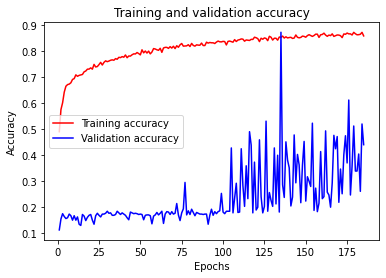

In [ ]:
history_dict = history_3.history

# learning curve - accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

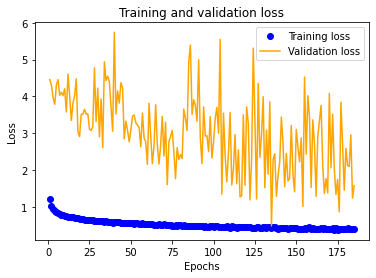

In [ ]:
# let's see the training and validation loss by epoch
history_dict = history_3.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
preds = np.round(model.predict(X_test),0)

# confusion matrix
print(confusion_matrix(dummy_y_test.argmax(axis=1), preds.argmax(axis=1)))

print(classification_report(dummy_y_test.argmax(axis=1), preds.argmax(axis=1)))

[[ 1  0  1  0  0  0]
 [ 2  2  6  1  0  0]
 [14  8 89 32  3  0]
 [11  3 20 65 10  1]
 [11  1  1  8 22  3]
 [ 1  0  0  1  3  0]]
              precision    recall  f1-score   support

           0       0.03      0.50      0.05         2
           1       0.14      0.18      0.16        11
           2       0.76      0.61      0.68       146
           3       0.61      0.59      0.60       110
           4       0.58      0.48      0.52        46
           5       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.35      0.39      0.33       320
weighted avg       0.64      0.56      0.60       320



### Model 4 Try if we remove high vif variable

In [ ]:
X = df.drop("quality", axis=1)
y = pd.DataFrame(df['quality'])

In [ ]:
# variation inflation factor
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,features,vif
0,fixed acidity,74.452265
1,volatile acidity,17.060026
2,citric acid,9.183495
3,residual sugar,4.662992
4,chlorides,6.554877
5,free sulfur dioxide,6.442682
6,total sulfur dioxide,6.519699
7,density,1479.287209
8,pH,1070.967685
9,sulphates,21.590621


In [ ]:
X_temp = X.drop("density", axis=1)
vif = pd.DataFrame()
vif["features"] = X_temp.columns
vif["vif"] = [variance_inflation_factor(X_temp.values, i) for i in range(X_temp.shape[1])]
vif

,features,vif
0,fixed acidity,40.216574
1,volatile acidity,17.058940
2,citric acid,9.149028
3,residual sugar,4.662789
4,chlorides,6.017799
5,free sulfur dioxide,6.390157
6,total sulfur dioxide,6.096300
7,pH,158.025734
8,sulphates,21.552410
9,alcohol,121.980842


In [ ]:
X_temp2 = X_temp.drop("pH", axis=1)
vif = pd.DataFrame()
vif["features"] = X_temp2.columns
vif["vif"] = [variance_inflation_factor(X_temp2.values, i) for i in range(X_temp2.shape[1])]
vif

,features,vif
0,fixed acidity,37.557809
1,volatile acidity,15.651760
2,citric acid,8.636667
3,residual sugar,4.660704
4,chlorides,5.935002
5,free sulfur dioxide,6.357695
6,total sulfur dioxide,5.987189
7,sulphates,21.218142
8,alcohol,37.137148


In [ ]:
X = X_temp2
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1279, 9) (320, 9) (1279, 1) (320, 1)


In [ ]:
# use minMax scaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

# work with labels
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
encoder.fit(y_test)
encoded_y_train = encoder.transform(y_train)
encoded_y_test = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_train= np_utils.to_categorical(encoded_y_train)
dummy_y_test = np_utils.to_categorical(encoded_y_test)

In [ ]:
# build the model!
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.2)) 
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax')) # output node
model.summary() # see what your model looks like

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 1000)              10000     
_________________________________________________________________
dropout_34 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_60 (Dense)             (None, 500)               500500    
_________________________________________________________________
dropout_35 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 6)                 3006      
Total params: 513,506
Trainable params: 513,506
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])

# early stopping callback
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=50, 
                                   restore_best_weights=True)
# fit the model!
history_4 = model.fit(X_train,
                    dummy_y_train,
                    callbacks=[es],
                    epochs=8000000, 
                    batch_size=10,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/8000000
103/103 [==============================] - 1s 7ms/step - loss: 1.1276 - accuracy: 0.5220 - val_loss: 1.0636 - val_accuracy: 0.5391
Epoch 2/8000000
103/103 [==============================] - 1s 6ms/step - loss: 1.0259 - accuracy: 0.5816 - val_loss: 0.9789 - val_accuracy: 0.5352
Epoch 3/8000000
103/103 [==============================] - 1s 6ms/step - loss: 0.9915 - accuracy: 0.6012 - val_loss: 0.9567 - val_accuracy: 0.6055
Epoch 4/8000000
103/103 [==============================] - 1s 6ms/step - loss: 0.9772 - accuracy: 0.5973 - val_loss: 0.9632 - val_accuracy: 0.5508
Epoch 5/8000000
103/103 [==============================] - 1s 7ms/step - loss: 0.9729 - accuracy: 0.5865 - val_loss: 0.9458 - val_accuracy: 0.6016
Epoch 6/8000000
103/103 [==============================] - 1s 6ms/step - loss: 0.9694 - accuracy: 0.5973 - val_loss: 0.9570 - val_accuracy: 0.5508
Epoch 7/8000000
103/103 [==============================] - 1s 6ms/step - loss: 0.9568 - accuracy: 0.5982 - val_loss: 0

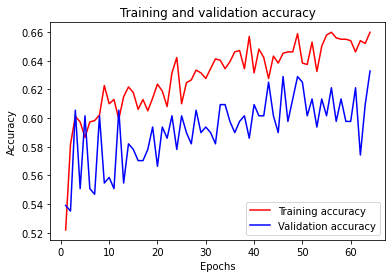

In [ ]:
history_dict = history_4.history

# learning curve - accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

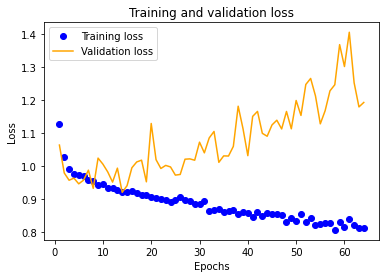

In [ ]:
# learning curve - loss
history_dict = history_4.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# pred for test data
pred_test = model.predict(X_test)
matrix = confusion_matrix(dummy_y_test.argmax(axis=1), pred_test.argmax(axis=1))
print(matrix)
# more detail on how well things were predicted
print(classification_report(dummy_y_test.argmax(axis=1), pred_test.argmax(axis=1)))

[[  0   0   2   0   0   0]
 [  0   0   9   2   0   0]
 [  0   0 100  43   3   0]
 [  0   0  30  60  20   0]
 [  0   0   4  15  27   0]
 [  0   0   0   0   5   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        11
           2       0.69      0.68      0.69       146
           3       0.50      0.55      0.52       110
           4       0.49      0.59      0.53        46
           5       0.00      0.00      0.00         5

    accuracy                           0.58       320
   macro avg       0.28      0.30      0.29       320
weighted avg       0.56      0.58      0.57       320



### Model 5 Modify Class Weight in Keras

In [ ]:
X = df.drop("quality", axis=1)
y = pd.DataFrame(df['quality'])


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1279, 11) (320, 11) (1279, 1) (320, 1)


In [ ]:
# use minMax scaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [ ]:
# work with labels
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
encoder.fit(y_test)
encoded_y_train = encoder.transform(y_train)
encoded_y_test = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_train= np_utils.to_categorical(encoded_y_train)
dummy_y_test = np_utils.to_categorical(encoded_y_test)

print(encoded_y_train)

[3 3 2 ... 3 2 2]


In [ ]:
print(dummy_y_train)

[[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [ ]:
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.2)) 
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 1000)              12000     
_________________________________________________________________
dropout_36 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_63 (Dense)             (None, 500)               500500    
_________________________________________________________________
dropout_37 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 6)                 3006      
Total params: 515,506
Trainable params: 515,506
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# calculate the class weight
class_weight_calculated = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y = np.ravel(y_train))
cw = dict(enumerate(class_weight_calculated))

# early stopping callback
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=50, 
                                   restore_best_weights=True)
# fit the model!
history_1 = model.fit(X_train,
                    dummy_y_train,
                    callbacks=[es],
                    epochs=8000000, 
                    batch_size=10,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1, 
                    class_weight= cw)

Epoch 1/8000000
103/103 [==============================] - 1s 8ms/step - loss: 1.9615 - accuracy: 0.4673 - val_loss: 1.4057 - val_accuracy: 0.4336
Epoch 2/8000000
103/103 [==============================] - 1s 6ms/step - loss: 1.7164 - accuracy: 0.4213 - val_loss: 1.4309 - val_accuracy: 0.4023
Epoch 3/8000000
103/103 [==============================] - 1s 6ms/step - loss: 1.5745 - accuracy: 0.3754 - val_loss: 1.2652 - val_accuracy: 0.4453
Epoch 4/8000000
103/103 [==============================] - 1s 6ms/step - loss: 1.5824 - accuracy: 0.3900 - val_loss: 1.6423 - val_accuracy: 0.2227
Epoch 5/8000000
103/103 [==============================] - 1s 6ms/step - loss: 1.5238 - accuracy: 0.3568 - val_loss: 1.4396 - val_accuracy: 0.3477
Epoch 6/8000000
103/103 [==============================] - 1s 6ms/step - loss: 1.4572 - accuracy: 0.3949 - val_loss: 1.2874 - val_accuracy: 0.3672
Epoch 7/8000000
103/103 [==============================] - 1s 6ms/step - loss: 1.5526 - accuracy: 0.3763 - val_loss: 1

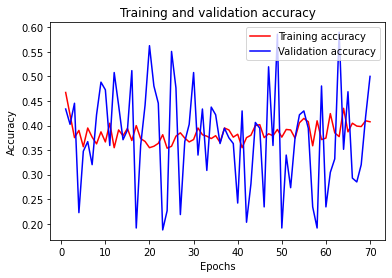

In [ ]:
history_dict = history_1.history

# learning curve - accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

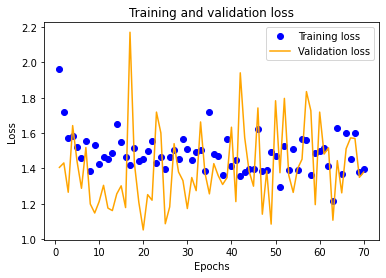

In [ ]:
# learning curve - loss
history_dict = history_1.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
preds = model.predict(X_train) # see how the model did!
matrix = confusion_matrix(dummy_y_train.argmax(axis=1), preds.argmax(axis=1))
matrix

array([[  2,   3,   2,   1,   0,   0],
       [  0,  19,  13,   9,   1,   0],
       [  2,  72, 358,  82,  21,   0],
       [  1,  31, 153, 212, 131,   0],
       [  0,   7,   4,  33, 109,   0],
       [  0,   0,   0,   0,  13,   0]])

In [ ]:
# more detail on how well things were predicted
print(classification_report(dummy_y_train.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.40      0.25      0.31         8
           1       0.14      0.45      0.22        42
           2       0.68      0.67      0.67       535
           3       0.63      0.40      0.49       528
           4       0.40      0.71      0.51       153
           5       0.00      0.00      0.00        13

    accuracy                           0.55      1279
   macro avg       0.37      0.41      0.37      1279
weighted avg       0.60      0.55      0.55      1279



In [ ]:
# test data
pred_test = model.predict(X_test)
pred_test


array([[2.7177403e-02, 3.4501335e-01, 1.8346314e-01, 3.0271274e-01,
        1.2090606e-01, 2.0727281e-02],
       [3.6836136e-05, 5.2376981e-03, 7.3349890e-03, 2.0224947e-01,
        6.3598359e-01, 1.4915742e-01],
       [1.6816078e-06, 4.8916798e-02, 7.8555149e-01, 1.5642855e-01,
        9.1013871e-03, 2.0380307e-07],
       ...,
       [2.7362861e-02, 2.4694990e-01, 3.6525816e-01, 3.0220008e-01,
        5.5967454e-02, 2.2616230e-03],
       [3.6367002e-01, 4.3433505e-01, 1.4033182e-01, 5.7185583e-02,
        4.3233135e-03, 1.5422491e-04],
       [4.8463494e-03, 1.4159489e-01, 1.9674154e-01, 4.5158535e-01,
        1.8978867e-01, 1.5443231e-02]], dtype=float32)

In [ ]:
matrix = confusion_matrix(dummy_y_test.argmax(axis=1), pred_test.argmax(axis=1))
matrix


array([[ 0,  1,  1,  0,  0,  0],
       [ 0,  7,  3,  1,  0,  0],
       [ 0, 24, 92, 23,  7,  0],
       [ 2,  5, 34, 40, 29,  0],
       [ 0,  0,  4, 11, 31,  0],
       [ 0,  0,  0,  0,  5,  0]])

In [ ]:
# more detail on how well things were predicted
print(classification_report(dummy_y_test.argmax(axis=1), pred_test.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.19      0.64      0.29        11
           2       0.69      0.63      0.66       146
           3       0.53      0.36      0.43       110
           4       0.43      0.67      0.53        46
           5       0.00      0.00      0.00         5

    accuracy                           0.53       320
   macro avg       0.31      0.38      0.32       320
weighted avg       0.56      0.53      0.53       320



### Model 6 try to recode the target variable
Since the model seems not doing pretty well, we try to recode our target variable to new labels:
* 3-5  -> 1
* 6  -> 2
* 7 -> 3
* 8 -> 4



In [ ]:
X = df.drop("quality", axis=1)
y = pd.DataFrame(df['quality'])
# convert to numpy array
X = np.array(X)

In [ ]:
y.value_counts()

quality
5          681
6          638
7          199
4           53
8           18
3           10
dtype: int64

In [ ]:
# Label the range
y['quality label'] = pd.cut(df['quality'], bins=[3,6,7,8,9], include_lowest=True, right=False, labels=[1,2,3,4])



In [ ]:
y['quality label'].value_counts()

1    744
2    638
3    199
4     18
Name: quality label, dtype: int64

In [ ]:
y = y.drop("quality", axis=1)
y.head()

,quality label
0,1
1,2
2,1
3,1
4,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1279, 11) (320, 11) (1279, 1) (320, 1)


In [ ]:
# use minMax scaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [ ]:
# work with labels
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
encoder.fit(y_test)
encoded_y_train = encoder.transform(y_train)
encoded_y_test = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_train= np_utils.to_categorical(encoded_y_train)
dummy_y_test = np_utils.to_categorical(encoded_y_test)

In [ ]:
# build the model!
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.3)) 
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax')) # output node
model.summary() # see what your model looks like

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 1000)              12000     
_________________________________________________________________
dropout_38 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_66 (Dense)             (None, 500)               500500    
_________________________________________________________________
dropout_39 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 4)                 2004      
Total params: 514,504
Trainable params: 514,504
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])

# early stopping callback
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=50, 
                                   restore_best_weights=True)
# fit the model!
history_5 = model.fit(X_train,
                    dummy_y_train,
                    callbacks=[es],
                    epochs=8000000, 
                    batch_size=10,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/8000000
103/103 [==============================] - 1s 7ms/step - loss: 0.9192 - accuracy: 0.5601 - val_loss: 0.8391 - val_accuracy: 0.6367
Epoch 2/8000000
103/103 [==============================] - 1s 6ms/step - loss: 0.8415 - accuracy: 0.6246 - val_loss: 1.0472 - val_accuracy: 0.4375
Epoch 3/8000000
103/103 [==============================] - 1s 6ms/step - loss: 0.8440 - accuracy: 0.5924 - val_loss: 0.8507 - val_accuracy: 0.6016
Epoch 4/8000000
103/103 [==============================] - 1s 6ms/step - loss: 0.8302 - accuracy: 0.6129 - val_loss: 0.8897 - val_accuracy: 0.5820
Epoch 5/8000000
103/103 [==============================] - 1s 6ms/step - loss: 0.8183 - accuracy: 0.6168 - val_loss: 0.8508 - val_accuracy: 0.6094
Epoch 6/8000000
103/103 [==============================] - 1s 6ms/step - loss: 0.8113 - accuracy: 0.6217 - val_loss: 0.8014 - val_accuracy: 0.6406
Epoch 7/8000000
103/103 [==============================] - 1s 6ms/step - loss: 0.8098 - accuracy: 0.6373 - val_loss: 0

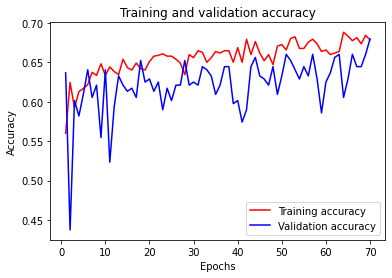

In [ ]:
history_dict = history_5.history

# learning curve - accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

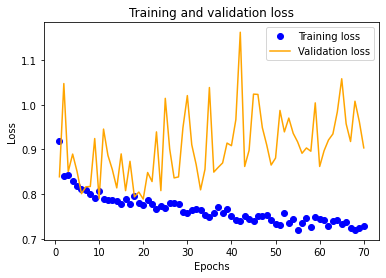

In [ ]:
# learning curve - loss
history_dict = history_5.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# actual is left, predicted is top
# names can be found by inspecting Y
preds = model.predict(X_train)
matrix = confusion_matrix(dummy_y_train.argmax(axis=1), preds.argmax(axis=1))
print(matrix)
print(classification_report(dummy_y_train.argmax(axis=1), preds.argmax(axis=1)))

[[470 103  12   0]
 [167 269  92   0]
 [  9  48  96   0]
 [  0   2  11   0]]
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       585
           1       0.64      0.51      0.57       528
           2       0.45      0.63      0.53       153
           3       0.00      0.00      0.00        13

    accuracy                           0.65      1279
   macro avg       0.45      0.49      0.46      1279
weighted avg       0.65      0.65      0.65      1279



In [ ]:
# pred for test data
pred_test = model.predict(X_test)
matrix = confusion_matrix(dummy_y_test.argmax(axis=1), pred_test.argmax(axis=1))
print(matrix)
# more detail on how well things were predicted
print(classification_report(dummy_y_test.argmax(axis=1), pred_test.argmax(axis=1)))

[[123  33   3   0]
 [ 37  56  17   0]
 [  4  16  26   0]
 [  0   2   3   0]]
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       159
           1       0.52      0.51      0.52       110
           2       0.53      0.57      0.55        46
           3       0.00      0.00      0.00         5

    accuracy                           0.64       320
   macro avg       0.45      0.46      0.46       320
weighted avg       0.63      0.64      0.63       320



### Model 7 Modify Class Weight in Keras and Decode

In [ ]:
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.2)) 
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 1000)              12000     
_________________________________________________________________
dropout_40 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_69 (Dense)             (None, 500)               500500    
_________________________________________________________________
dropout_41 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 4)                 2004      
Total params: 514,504
Trainable params: 514,504
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# calculate the class weight
class_weight_calculated = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y = np.ravel(y_train))
cw = dict(enumerate(class_weight_calculated))

# early stopping callback
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=50, 
                                   restore_best_weights=True)
# fit the model!
history_1 = model.fit(X_train,
                    dummy_y_train,
                    callbacks=[es],
                    epochs=8000000, 
                    batch_size=10,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1, 
                    class_weight= cw)

Epoch 1/8000000
103/103 [==============================] - 1s 7ms/step - loss: 1.4198 - accuracy: 0.5044 - val_loss: 0.9758 - val_accuracy: 0.5742
Epoch 2/8000000
103/103 [==============================] - 1s 6ms/step - loss: 1.2369 - accuracy: 0.5435 - val_loss: 0.8672 - val_accuracy: 0.5977
Epoch 3/8000000
103/103 [==============================] - 1s 6ms/step - loss: 1.2416 - accuracy: 0.5337 - val_loss: 1.3463 - val_accuracy: 0.3750
Epoch 4/8000000
103/103 [==============================] - 1s 6ms/step - loss: 1.1313 - accuracy: 0.5288 - val_loss: 1.1325 - val_accuracy: 0.4648
Epoch 5/8000000
103/103 [==============================] - 1s 6ms/step - loss: 1.1430 - accuracy: 0.5269 - val_loss: 0.9723 - val_accuracy: 0.5000
Epoch 6/8000000
103/103 [==============================] - 1s 6ms/step - loss: 1.0671 - accuracy: 0.5152 - val_loss: 0.8468 - val_accuracy: 0.5977
Epoch 7/8000000
103/103 [==============================] - 1s 6ms/step - loss: 1.2888 - accuracy: 0.5200 - val_loss: 0

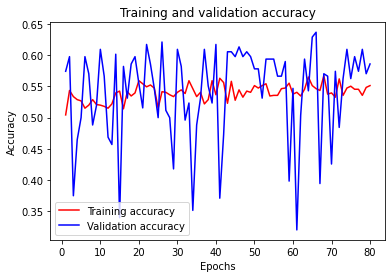

In [ ]:
history_dict = history_1.history

# learning curve - accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

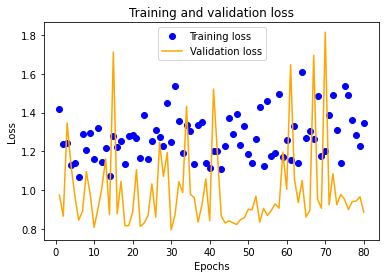

In [ ]:
# learning curve - loss
history_dict = history_1.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
preds = model.predict(X_train) # see how the model did!
matrix = confusion_matrix(dummy_y_train.argmax(axis=1), preds.argmax(axis=1))
matrix

array([[465, 112,   8,   0],
       [177, 286,  64,   1],
       [  9,  74,  70,   0],
       [  0,   5,   8,   0]])

In [ ]:
# more detail on how well things were predicted
print(classification_report(dummy_y_train.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       585
           1       0.60      0.54      0.57       528
           2       0.47      0.46      0.46       153
           3       0.00      0.00      0.00        13

    accuracy                           0.64      1279
   macro avg       0.45      0.45      0.45      1279
weighted avg       0.63      0.64      0.63      1279



In [ ]:
# test data
pred_test = model.predict(X_test)
pred_test


array([[4.3813154e-01, 4.5616838e-01, 1.0504062e-01, 6.5945648e-04],
       [3.1885274e-02, 4.7054806e-01, 4.6624681e-01, 3.1319831e-02],
       [7.9369283e-01, 2.0531054e-01, 9.9660864e-04, 1.0139655e-09],
       ...,
       [4.9522766e-01, 4.6539730e-01, 3.9366793e-02, 8.2736769e-06],
       [7.9499519e-01, 2.0330642e-01, 1.6984183e-03, 9.9554320e-09],
       [2.9132760e-01, 5.6759715e-01, 1.4066617e-01, 4.0910157e-04]],
      dtype=float32)

In [ ]:
matrix = confusion_matrix(dummy_y_test.argmax(axis=1), pred_test.argmax(axis=1))
matrix


array([[122,  35,   2,   0],
       [ 39,  61,  10,   0],
       [  5,  23,  18,   0],
       [  0,   1,   4,   0]])

In [ ]:
# more detail on how well things were predicted
print(classification_report(dummy_y_test.argmax(axis=1), pred_test.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       159
           1       0.51      0.55      0.53       110
           2       0.53      0.39      0.45        46
           3       0.00      0.00      0.00         5

    accuracy                           0.63       320
   macro avg       0.44      0.43      0.43       320
weighted avg       0.62      0.63      0.62       320



# Results and Discussion 
### Training and Validation Accuracy
From the training and validation accuracy plots we can see that the accuracy of the training has a trend of increasing while the accuracy of the validation is fluctuating severely, especially for the models with class weight modifiication and models with oversampling. The reason for fluctuation of validation accuracy from these models is that we force the net to pay attention to minorities or we change the distribution of input variables, which is not consistent with the reality. And we can only make changes on training dataset because we want to keep the reality of validation and test dataset. Then the inconsistency influences the accuracy greatly.


### Training and Validation Loss
We can know that during the process of the training of the neural network, all the models, except models with class weight modification, have a almostly continuous downward training loss curve and a fluctuating validation loss curve which is as we expected. 

As we all know, the FFNN uses gradient to update the weight. And the smoother the gradient is, the flatter the loss will be. If we modify the class wight, increasing the weight of the minority and the influence of them on gradient, the gradient will fluctuate, even vanishing or exploding. As a result, the training loss of models with class weight modification is also fluctuating.


### Confusion Matrix and Classification Report
#### 1. Model vs Baseline
All of our models are better than baseline.
#### 2. Classification vs Regression
There is no much difference between these two methods. Performances of them are both good at predicting majorities but not good for the minorities.
#### 3. Original Sample vs Oversampling
Though oversampling decrease the total accuracy a little bit, it can make our model better at predicting minorities than the original one. 
#### 4. Original Variables vs VIF
Not so much difference between these two methods. However, when the dataset is much too larger than what we have now, maybe VIF method can help you save the time for traning the model by decreasing the complexity of your net and still keeping the accuracy.
#### 5. Original Class Weight vs Modified Class Weight
After modifying the class weight, the total accuracy can be higher than the original one. But in the meanwhile, the accuracy for majoities will decrease because of more attention to the minorities.
#### 6. Original Class vs Decoded Class
We decrease the class to make the distribution of the quality more normal. The result shows that we actually can use this method to increase our total accuracy. The inspiration of decodeing target is that we want to focus on the accuracy of quality class higher than 5.


### Business Value
Whinries or wine dealers are always willing to save time and reduce cost to get more money. So our model can help them to monitor and evaluate their products before they sell wine.

Most importantly, different whinries or wine dealers have different target customers. We have suggestions on choosing models to predict as well:

For those whose target customers are people not rich or just want to take a taste, they don't want to dry low quality wine. And for rich people or experts, they typically favor high quality wine. In this case, we recommend using model with oversampling or class weight modification because they have better performance on distinguish the minority class from others. Then develop manufacturing technique to produce proper products.


For those big factories, we recommend VIF model as a result of simplicity, which can save you a lof time and cost with your large dataset.

For those some wine dealers whose requirements are not so high, we recommend using the original network due to its accuracy to help you avoid making mistakes.

# Conclusion

* Data EDA, check the distribution of our variables and make 3D plots to check how our data distribute base on different dimension.

* Check target variables and predict variables. Preprossing data before modeling, which including vif method, recode target, oversample minority class, train and test split.

* Fit classification and regression FFNN model on original data, than compare the performance of each model by evaluate the confusion matrix and classification report.

* Fit classification FFNN model on oversample data, and fit model after we check run a vif analysis and delete 2 variables with high multicollinearity. 

* Fit 2 class weight model with original data and decode target data. Than compare the reuslt of all the models.



## Reference



[1] Growth is Slowing but Consumer Trends Present Opportunities for the Wine Industry

https://www.winebusiness.com/news/?go=getArticle&dataId=224817


[2]How winemakers are adapting to reach young consumers

https://www.capitalpress.com/ag_sectors/orchards_nuts_vines/how-winemakers-are-adapting-to-reach-young-consumers/article_4fb6d96e-5e44-11ea-add6-cf4290c3f7df.html

[3]How will coronavirus affect wine consumption? 

https://www.beveragedaily.com/Article/2020/04/07/How-coronavirus-is-shifting-consumer-trends-in-the-wine-industry

[4]Wine Industry Growth Rate & Wine Profit Margins

https://home.binwise.com/blog/wine-industry-growth-rate#:~:text=The%20industry%20standard%20for%20profit,of%20selling%20directly%20to%20consumers.

[5]Cavaglia, J., Schorn-García, D., Giussani, B., Ferré, J., Busto, O., Aceña, L., ... & Boqué, R. (2020). ATR-MIR spectroscopy and multivariate analysis in alcoholic fermentation monitoring and lactic acid bacteria spoilage detection. Food Control, 109, 106947.

https://www.sciencedirect.com/science/article/pii/S0956713519305365

[6]Technology used in red wine production

https://blog.drinktec.com/wine/technology-used-in-red-wine-production/#:~:text=2.,CO2%20or%20alcohol%20extraction.

[7]Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Modeling wine preferences by data mining from physicochemical properties. Decision Support Systems, 47(4), 547-553.

https://www.sciencedirect.com/science/article/pii/S0167923609001377?via%3Dihub#aep-bibliography-id29

[8]Wine Type and Quality Classification

https://www.kaggle.com/mgmarques/wines-type-and-quality-classification-exercises

[9]Optimizing wine quality in Australia, Coonawarra wine region: vinification and fermentation control management in Shiraz wine. Internship report.

https://www.repository.utl.pt/handle/10400.5/19578

[10]Monitoring & Adjusting pH

https://winemakermag.com/technique/1650-monitoring-adjusting-ph#:~:text=To%20increase%20pH%2C%20use%20a,%2C%20high%2Dmalic%20acid%20wines.
